In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path

In [11]:
#this is where all downladed data exists (after extracting the zip file)

#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' #this is relational, assuming that this file runs from the analysis folder. 

# total number of batches to enter into the anaylsis
total_batches = [1,2,3]

In [12]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_valid_subjects = pd.concat([all_valid_subjects,file])

Text(0, 0.5, 'RT')

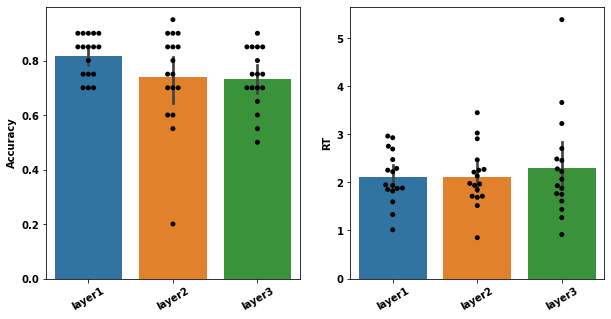

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.barplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')

### ANOVA 

In [14]:
temp = all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy','testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']]

df = pd.DataFrame({'patient': np.repeat(temp.index, 3),
                   'layer': np.tile([1, 2,3], temp.shape[0]),
                   'accuracy': temp[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']].to_numpy().ravel(),
                    'rt': temp[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']].to_numpy().ravel() })

# Conduct the repeated measures ANOVA
print(AnovaRM(data=df, depvar='accuracy',
              subject='patient', within=['layer']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
layer  4.1448 2.0000 32.0000 0.0251



### CORRELATION 

In [15]:
curr_layer = df[df['layer'] == 2
               ]
curr_layer['accuracy'].corr(curr_layer['rt'])

0.31698539057348635

### Testing the criterions